# 1. 강의영상 

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt

# 3. Data

In [334]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_manytoeic.csv")

In [335]:
df

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
0,-0.949314,0.051535,135,134.889567,132.466381,134.328746,133.692285,134.490387,133.482738,135.805902,...,134.568925,135.248135,135.557690,134.307587,136.115518,136.895841,135.599610,134.083179,135.125554,134.320048
1,4.861725,0.355496,935,933.897710,934.928312,935.665096,934.115679,934.204277,935.213653,935.551083,...,932.507220,934.449154,935.213485,935.216839,935.039467,935.400347,934.172674,935.189259,936.578955,937.278620
2,5.582663,2.228435,485,483.020037,484.161879,486.041920,482.954745,485.891348,484.849052,485.410756,...,484.863750,485.516249,484.523790,486.036836,485.011074,485.637154,484.001982,485.544729,485.815829,485.042914
3,3.919694,1.179701,65,66.780387,67.388852,65.622595,62.763278,65.935953,67.288798,66.314210,...,64.151163,64.677268,66.340589,64.291130,64.540950,66.728237,65.474820,65.725247,65.015707,65.399658
4,8.286851,3.962356,445,444.348116,445.520801,446.419087,442.715198,445.043974,444.849464,446.178144,...,444.993117,444.999768,445.773163,444.924819,442.703987,445.118233,445.119561,446.214723,444.983397,444.455462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7.002081,4.288465,280,280.520486,281.060157,281.291354,280.816827,280.867509,279.748219,280.956388,...,280.864668,280.261168,278.871055,280.267526,279.792068,279.931181,280.606405,280.710435,279.602746,280.472047
496,5.431050,2.601212,310,310.015294,310.003728,308.680788,309.179518,310.908038,308.580682,308.720718,...,310.670717,310.872724,309.631197,309.723108,309.624440,310.207927,308.519863,309.858127,310.602814,310.841082
497,0.088812,0.042323,225,225.226422,225.738373,223.342848,226.416036,223.478492,225.080199,224.896846,...,223.252383,226.178697,225.494945,225.154573,225.254684,224.711397,225.259744,223.700222,225.700224,225.120175
498,3.806388,1.041416,320,321.135794,319.880713,319.759936,321.071771,320.085155,320.657430,320.802495,...,319.875882,321.006234,319.054499,320.498798,320.407021,323.002351,319.496038,320.011256,319.304070,320.418582


# 4. 분석

`-` 적용할 방법: Lasso

In [336]:
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=7)

In [337]:
X = df_train.drop(['employment_score'],axis=1)
XX = df_test.drop(['employment_score'],axis=1)
y = df_train[['employment_score']]
yy = df_test[['employment_score']]

In [354]:
prdtr = sklearn.linear_model.Lasso()

In [355]:
prdtr.fit(X,y)
#prdtr.coef_

/home/cgb2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.763e-01, tolerance: 1.961e-01
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [356]:
prdtr.score(X,y)

0.7292317194868381

In [357]:
prdtr.score(XX,yy)

0.6938703049845618

# 5. Lasso의 비법

`-` LinearRegression vs Lasso

In [358]:
prdtr_list = [sklearn.linear_model.LinearRegression(), sklearn.linear_model.Lasso(alpha=1)]

In [359]:
for prdtr in prdtr_list:
    prdtr.fit(X,y)

/home/cgb2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.763e-01, tolerance: 1.961e-01
  model = cd_fast.enet_coordinate_descent(


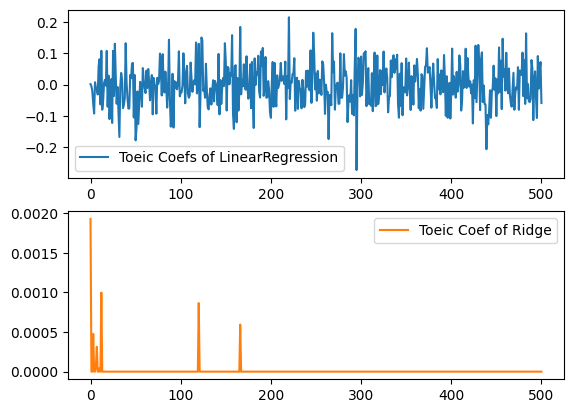

In [360]:
fig,ax = plt.subplots(2)
ax[0].plot(prdtr_list[0].coef_.reshape(-1)[1:],label='Toeic Coefs of LinearRegression',color='C0')
ax[0].legend()
ax[1].plot(prdtr_list[1].coef_.reshape(-1)[1:],label='Toeic Coef of Ridge',color='C1')
ax[1].legend()

`-` Lasso는 훨씬 Spare한 Coef를 가진다. 

In [361]:
(abs(prdtr_list[0].coef_)>0).sum() # 502개 모두 값이 있음..

502

In [362]:
(abs(prdtr_list[1].coef_)>0).sum() # 대부분0이고 7개정도만 0이 아님

9

# 6. 하이퍼파라메터

## A. $\alpha$ 에 따른 변화 관찰 

`-` LinearRegression vs Lasso

In [428]:
prdtr_list = [sklearn.linear_model.Lasso(alpha=1),sklearn.linear_model.Lasso(alpha=0.3)]

In [431]:
for prdtr in prdtr_list:
    prdtr.fit(X,y)

/home/cgb2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.763e-01, tolerance: 1.961e-01
  model = cd_fast.enet_coordinate_descent(
/home/cgb2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.469e-01, tolerance: 1.961e-01
  model = cd_fast.enet_coordinate_descent(


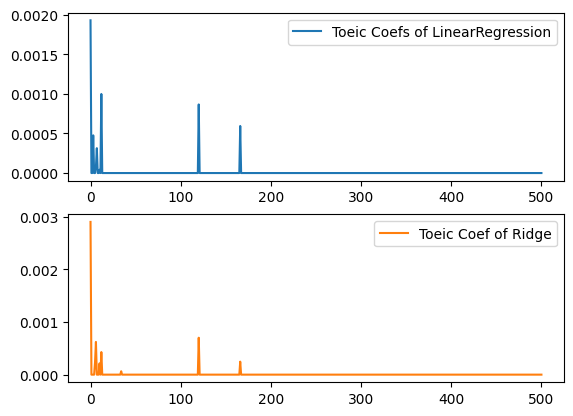

In [432]:
fig,ax = plt.subplots(2)
ax[0].plot(prdtr_list[0].coef_.reshape(-1)[1:],label='Toeic Coefs of LinearRegression',color='C0')
ax[0].legend()
ax[1].plot(prdtr_list[1].coef_.reshape(-1)[1:],label='Toeic Coef of Ridge',color='C1')
ax[1].legend()

## B. 좀 더 많은 실험

In [433]:
alphas = np.linspace(0,1,100)
alphas

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [434]:
prdtr_list = [sklearn.linear_model.Lasso(alpha=a) for a in alphas]
for prdtr in prdtr_list:
    prdtr.fit(X,y)

/home/cgb2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/cgb2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/cgb2/anaconda3/envs/torch/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+02, tolerance: 1.961e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.R

In [435]:
nonzero_coefs = [abs(prdtr.coef_>0).sum() for prdtr in prdtr_list] 

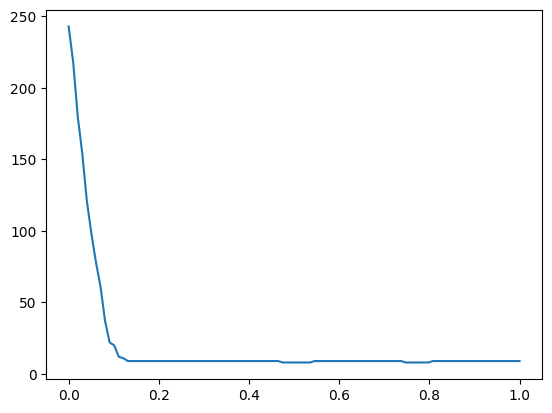

In [437]:
plt.plot(alphas, nonzero_coefs)